From milestone 1, we came up with the following questions to help analyze the data:
* How do popular videos compare in terms of the number of likes, dislikes, and comments?
* Are views affected by the time of year?
* Do videos with more tags get more comments?
* Are the videos trending on a particular day a dependent variable of what videos trended on previous days? If so, in what way?


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from patsy import dmatrices
plt.style.use('seaborn')

In [11]:
us_data = pd.read_csv('USvideos_updated.csv')

### Question 3
To address the question of whether videos with more tags get more comments we will conduct linear regression analysis and see the relationship between the two variables.

Since a column that measures the amount of tags on a video is not included in the data, we created a column that measures such value.

In [19]:
comment_enabled = us_data[us_data['comments_disabled'] == False] # removes videos that have comments disabled

In [20]:
Y, X = dmatrices('np.log(comment_count+1) ~ tag_count', data=comment_enabled, return_type='dataframe')
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     np.log(comment_count + 1)   R-squared:                       0.007
Model:                                   OLS   Adj. R-squared:                  0.007
Method:                        Least Squares   F-statistic:                     298.0
Date:                       Mon, 11 May 2020   Prob (F-statistic):           1.57e-66
Time:                               14:09:42   Log-Likelihood:                -81723.
No. Observations:                      40228   AIC:                         1.635e+05
Df Residuals:                          40226   BIC:                         1.635e+05
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2423      0.018    410.162      0.000       7.208       7.277
tag_count      0.0132      0.001     17.262      0.000       0.012       0.015
==============================================================================
Omnibus:                     2347.688   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4041.217
Skew:                          -0.461   Prob(JB):                         0.00
Kurtosis:                       4.249   Cond. No.                         44.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary output the linear regression equation becomes $log(\text{Comment count} + 1) = 0.0132(\text{Tag Count}) + 7.2420$. The regression equation shows that the variables are statistically significant, and the $R^2 = 0.007$

Now we check to see if the assumptions of a linear regression are satsified.

In [21]:
influence = model.get_influence()
standarized_residual = influence.resid_studentized_internal

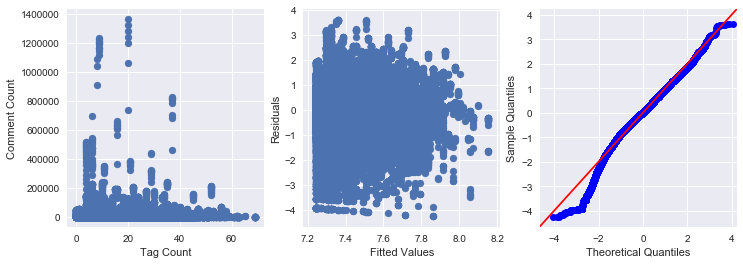

In [64]:
fig = plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
plt.scatter(comment_enabled['tag_count'], comment_enabled['comment_count'])
plt.xlabel('Tag Count')
plt.ylabel('Comment Count')

plt.subplot(1,3,2)
plt.scatter(model.predict(X), standarized_residual)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

ax = plt.subplot(1, 3, 3)
sm.qqplot(standarized_residual, fit = True, line='45', ax = ax)
plt.show()

The scatter plot (left plot) shows no apparent linear relationship between the amount of comments and tags attached to the video. The residual plot (middle plot) shows constant error variance but the points seems to be cluttered more in the range of 7.2~7.9. The qqPlot (right plot) shows that all points are not aligned around the line $y=x$. Since there are overlapping videos in the data, we can not assume that the data are independent. Therfore, the assumptions of linear regression are not satisfied.

We conclude that there is no relationship between comment count and tag_count.